In [1]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score



In [2]:
files = glob.glob('*.csv')
dfs = []
for file in files:
    if file != 'extraterrestrial data.csv':
        df = pd.read_csv(file)
        dfs.append(df)
data=pd.concat(dfs)
data

,Date/Time,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),[1] Wind Direction (°),[1] Wind Speed (m/s),BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)
0,Year 1 Jan 01 01:00,23.47,69.79,0.0,6.0,0.0,0.0,20.0,40.0,0.0,40.0,2.5,19.055440
1,Year 1 Jan 01 02:00,23.47,69.79,0.0,5.8,0.0,0.0,19.4,41.0,0.0,38.0,2.5,18.783099
2,Year 1 Jan 01 03:00,23.47,69.79,0.0,5.4,0.0,0.0,18.9,41.0,0.0,38.0,2.5,18.391790
3,Year 1 Jan 01 04:00,23.47,69.79,0.0,5.4,0.0,0.0,18.5,42.0,0.0,42.0,2.6,18.021314
4,Year 1 Jan 01 05:00,23.47,69.79,0.0,4.3,0.0,0.0,18.1,40.0,0.0,46.0,2.8,17.675530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,Year 1 Dec 31 20:00,23.39,87.51,90.0,18.7,0.0,0.0,20.4,90.0,0.5,68.0,0.2,22.702643
8756,Year 1 Dec 31 21:00,23.39,87.51,90.0,18.2,0.0,0.0,19.5,92.0,0.2,66.0,0.2,21.824334
8757,Year 1 Dec 31 22:00,23.39,87.51,90.0,17.8,0.0,0.0,18.8,94.0,0.0,64.0,0.3,21.068009
8758,Year 1 Dec 31 23:00,23.39,87.51,90.0,17.7,0.0,0.0,18.3,96.0,0.1,66.0,0.3,20.407125


In [3]:
data.columns


Index(['Date/Time', 'Lats', 'Longs', 'Orientation',
       '[1] Dew Point Temperature (C)',
       '[1] Diffuse Horizontal Radiation (Wh/m2)',
       '[1] Direct Normal Radiation (Wh/m2)', '[1] Dry Bulb Temperature (C)',
       '[1] Relative Humidity ()', '[1] Total Sky Cover (tenths)',
       '[1] Wind Direction (°)', '[1] Wind Speed (m/s)',
       'BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)'],
      dtype='object')

In [4]:
data.describe()

,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),[1] Wind Direction (°),[1] Wind Speed (m/s),BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)
count,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210219.000000
mean,23.393333,79.566667,135.000000,16.430544,94.286886,173.602675,25.744094,62.831031,3.458056,206.549416,1.473155,30.168432
std,0.063421,6.317416,100.623298,8.527406,115.625916,249.868796,7.119398,25.546457,4.275378,100.552894,1.042656,8.858089
min,23.310000,69.790000,0.000000,-40.300000,0.000000,0.000000,2.200000,1.000000,0.000000,0.000000,0.000000,5.188952
25%,23.310000,74.100000,67.500000,10.500000,0.000000,0.000000,21.700000,41.000000,0.000000,118.000000,0.700000,24.813117
50%,23.415000,79.965000,135.000000,18.700000,8.000000,3.000000,26.300000,66.000000,0.200000,239.000000,1.200000,29.439182
75%,23.440000,86.070000,202.500000,23.500000,200.000000,359.000000,30.100000,86.000000,9.000000,284.000000,2.000000,35.282591
max,23.470000,87.510000,270.000000,31.700000,463.000000,850.000000,47.400000,100.000000,10.000000,360.000000,7.300000,63.572849


In [5]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.replace('Year 1 ', '2002'), format="%Y%b %d %H:%M")

In [6]:
%pip install ephem

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd

# Assuming you have the DataFrame 'data' with the given columns
# Set observer's latitude and longitude
lstm = 15 * 5.5  # Local Standard Time Meridian for India

# Calculate the day of the year from the 'Date/Time' column
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['day'] = data['Date/Time'].dt.dayofyear

# Calculate Equation of Time (EoT)
B = 360 / 365 * (data['day'] - 81)
eot = 9.87 * np.sin(2 * np.radians(B)) - 7.53 * np.cos(np.radians(B)) - 1.5 * np.sin(np.radians(B))

# Calculate Time Correction (TC)
tc = 4 * (data['Longs'] - lstm) + eot

# Convert 'Date/Time' to local time (Local Standard Time, LST)
data['Local Time'] = data['Date/Time'] + pd.to_timedelta(tc, unit='m')

# Calculate Hour Angle (HRA)
data['hra'] = 15 * (data['Local Time'].dt.hour + data['Local Time'].dt.minute / 60 - 12)




In [8]:
data['Local Time']

0      2002-01-01 00:05:27.289300596
1      2002-01-01 01:05:27.289300596
2      2002-01-01 02:05:27.289300596
3      2002-01-01 03:05:27.289300596
4      2002-01-01 04:05:27.289300596
                    ...             
8755   2002-12-31 20:16:47.025904572
8756   2002-12-31 21:16:47.025904572
8757   2002-12-31 22:16:47.025904572
8758   2002-12-31 23:16:47.025904572
8759                             NaT
Name: Local Time, Length: 210232, dtype: datetime64[ns]

In [9]:
def solar_altitude_angle(LAT, delta, H):

    # Convert degrees to radians
    LAT_rad = np.radians(LAT)
    delta_rad = np.radians(delta)
    H_rad = np.radians(H)
    
    # Calculate solar elevation angle
    beta_rad = np.arcsin(np.sin(LAT_rad) * np.sin(delta_rad) + np.cos(LAT_rad) * np.cos(delta_rad) * np.cos(H_rad))
    beta_deg = np.degrees(beta_rad)
    
    return beta_deg
# Calculate declination
day_angle = 360 * (284 + data['day']) / 365
data['declination'] = 23.45 * np.sin(np.radians(day_angle))

# Assuming your DataFrame is named 'data'
# Extract required columns
LAT = data['Lats']
delta = data['declination']
H = data['hra']

# Calculate solar elevation angle
data['Solar Altitde Angle'] = solar_altitude_angle(LAT, delta, H)
latitude = data['Lats']

# Assuming data['hra'] represents hour angle
hour_angle = data['hra']

# Calculate solar zenith angle
data['solar_zenith'] = 90 - data['Solar Altitde Angle']

In [10]:


# Define a function to calculate solar azimuth angle for a single row
def calculate_single_solar_azimuth(local_hour, declination, latitude, hra):
    if local_hour < 12:
        return np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))
    else:
        return 360 - np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))

# Vectorized calculation of solar azimuth angle
data['solar_azimuth'] = np.where(data['Local Time'].dt.hour < 12,
                                  np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))),
                                  360 - np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))))


In [11]:
data['Wall Azimuth'] = data['Orientation'].replace({0: 180, 180: 0, 90: 270, 270: 90})

data['AOI'] = np.degrees(np.arccos(np.sin(np.radians(data['solar_zenith'])) * np.cos(np.radians(data['solar_azimuth']-data['Wall Azimuth']))))


In [12]:
def calculate_IRH(Tdb_C, Tdp_C):
    # Convert temperatures to Kelvin
    Tdb_K = Tdb_C + 273.15  # Drybulb temperature in Kelvin
    Tdp_K = Tdp_C + 273.15  # Dewpoint temperature in Kelvin
    
    # Calculate sky emissivity (ϵsky) using the correlation from Clark & Allen (1978)
    ϵsky_clear = 0.787 + 0.764 * np.log(Tdp_K / 273)
    
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate the rate of infrared radiation emitted from the sky (IRH)
    IRH = ϵsky_clear * sigma * Tdb_K**4
    return IRH

# Example usage:
Tdb_data_C = data['[1] Dry Bulb Temperature (C)']  # Drybulb temperature in Celsius
Tdp_data_C = data['[1] Dew Point Temperature (C)']  # Dewpoint temperature in Celsius

IRH_data = calculate_IRH(Tdb_data_C, Tdp_data_C)
def calculate_Tsky(IRH):
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate sky temperature (Tsky) using the formula
    Tsky = (IRH / sigma)**0.25 - 273.15
    return Tsky

# Example usage:
 # Rate of infrared radiation emitted from the sky in W/m^2

Tsky_data = calculate_Tsky(IRH_data)
data['Tsky'] = Tsky_data

In [13]:
Y = np.maximum(0.45, 0.55 + 0.437 * np.cos(np.radians(data['AOI'])) + 0.313 * np.cos(np.radians(data['AOI']))**2)

In [14]:
data['DNR on wall']=data['[1] Direct Normal Radiation (Wh/m2)']*np.cos(np.radians(data['AOI']))
data['Diffuse_on_wall']=data['[1] Diffuse Horizontal Radiation (Wh/m2)']*Y
data['E_ground']=(data['[1] Direct Normal Radiation (Wh/m2)']*np.sin(np.radians(data['Solar Altitde Angle']))+data['[1] Diffuse Horizontal Radiation (Wh/m2)'])*0.2*(1+np.cos(np.radians(data['Solar Altitde Angle'])))/2

In [15]:
data['H']=12.49+4.065*data['[1] Wind Speed (m/s)']+0.028*data['[1] Wind Speed (m/s)']**2

In [16]:
data['E/H']=(data['DNR on wall']+data['Diffuse_on_wall']+data['E_ground'])/data['H']
# data['t_longwave']=(data['[1] Dry Bulb Temperature (C)']-data['Tsky'])/data['H']
data

,Date/Time,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),...,solar_zenith,solar_azimuth,Wall Azimuth,AOI,Tsky,DNR on wall,Diffuse_on_wall,E_ground,H,E/H
0,2002-01-01 01:00:00,23.47,69.79,0.0,6.0,0.0,0.0,20.0,40.0,0.0,...,178.763357,89.546635,180.0,90.009784,4.441786,-0.0,0.0,0.0,22.82750,0.0
1,2002-01-01 02:00:00,23.47,69.79,0.0,5.8,0.0,0.0,19.4,41.0,0.0,...,165.069484,90.380729,180.0,89.901907,3.826451,0.0,0.0,0.0,22.82750,0.0
2,2002-01-01 03:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.9,41.0,0.0,...,151.339062,92.589853,180.0,88.758166,3.258699,0.0,0.0,0.0,22.82750,0.0
3,2002-01-01 04:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.5,42.0,0.0,...,137.690493,96.032023,180.0,85.943742,2.880121,0.0,0.0,0.0,23.24828,0.0
4,2002-01-01 05:00:00,23.47,69.79,0.0,4.3,0.0,0.0,18.1,40.0,0.0,...,124.178882,100.501287,180.0,81.327899,2.241541,0.0,0.0,0.0,24.09152,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2002-12-31 20:00:00,23.39,87.51,90.0,18.7,0.0,0.0,20.4,90.0,0.5,...,128.888179,261.044129,270.0,39.746294,7.712980,0.0,0.0,0.0,13.30412,0.0
8756,2002-12-31 21:00:00,23.39,87.51,90.0,18.2,0.0,0.0,19.5,92.0,0.2,...,142.455627,265.165849,270.0,52.612105,6.742386,0.0,0.0,0.0,13.30412,0.0
8757,2002-12-31 22:00:00,23.39,87.51,90.0,17.8,0.0,0.0,18.8,94.0,0.0,...,156.139838,268.186131,270.0,66.152536,5.985289,0.0,0.0,0.0,13.71202,0.0
8758,2002-12-31 23:00:00,23.39,87.51,90.0,17.7,0.0,0.0,18.3,96.0,0.1,...,169.890252,269.919651,270.0,79.890262,5.485339,0.0,0.0,0.0,13.71202,0.0


In [17]:
data.describe()

,Date/Time,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),...,solar_zenith,solar_azimuth,Wall Azimuth,AOI,Tsky,DNR on wall,Diffuse_on_wall,E_ground,H,E/H
count,210216,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,...,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,2.102160e+05,210216.000000,210216.000000,210216.000000,210216.000000
mean,2002-07-02 11:59:59.999999872,23.393333,79.566667,135.000000,16.430544,94.286886,173.602675,25.744094,62.831031,3.458056,...,89.989812,179.728361,135.000000,90.000000,12.287072,-4.291865e-15,60.045265,34.022540,18.569581,5.004847
min,2002-01-01 01:00:00,23.310000,69.790000,0.000000,-40.300000,0.000000,0.000000,2.200000,1.000000,0.000000,...,0.461214,43.094511,0.000000,0.250000,-14.362206,-5.796419e+02,0.000000,-0.041041,12.490000,-25.514622
25%,2002-04-02 06:00:00,23.310000,74.100000,67.500000,10.500000,0.000000,0.000000,21.700000,41.000000,0.000000,...,52.529486,89.837090,67.500000,62.522736,7.702722,-4.625621e-01,0.000000,0.000000,15.349220,0.000000
50%,2002-07-02 12:00:00,23.415000,79.965000,135.000000,18.700000,8.000000,3.000000,26.300000,66.000000,0.200000,...,90.032456,136.758625,135.000000,90.000000,13.540551,0.000000e+00,4.950000,1.534496,17.408320,0.000000
75%,2002-10-01 18:00:00,23.440000,86.070000,202.500000,23.500000,200.000000,359.000000,30.100000,86.000000,9.000000,...,127.487842,269.837382,202.500000,117.477264,17.449607,4.625621e-01,112.962423,71.229345,20.732000,7.174401
max,2002-12-31 23:00:00,23.470000,87.510000,270.000000,31.700000,463.000000,850.000000,47.400000,100.000000,10.000000,...,179.886271,316.755159,270.000000,179.750000,31.655441,5.796419e+02,373.007569,138.947769,43.656620,61.385116
std,NaN,0.063421,6.317416,100.623298,8.527406,115.625916,249.868796,7.119398,25.546457,4.275378,...,43.634033,92.844113,100.623298,37.280621,7.830453,1.447914e+02,77.202767,44.786361,4.368115,11.277121


In [546]:
data['Hour'] = data['Date/Time'].dt.hour
data['Windward'] = np.where(data['[1] Wind Direction (°)'] - data['Orientation'] >= 0, 1, 0.5)
data['sin_hour']=(np.sin(2 * (np.pi / 24) * data['Hour'] -28*np.pi/24))
data['[1] Total Sky Cover (tenths)']=1/(data['[1] Total Sky Cover (tenths)']+0.1)

In [547]:
data.columns

Index(['Date/Time', 'Lats', 'Longs', 'Orientation',
       '[1] Dew Point Temperature (C)',
       '[1] Diffuse Horizontal Radiation (Wh/m2)',
       '[1] Direct Normal Radiation (Wh/m2)', '[1] Dry Bulb Temperature (C)',
       '[1] Relative Humidity ()', '[1] Total Sky Cover (tenths)',
       '[1] Wind Direction (°)', '[1] Wind Speed (m/s)',
       'BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)',
       'day', 'Local Time', 'hra', 'declination', 'Solar Altitde Angle',
       'solar_zenith', 'solar_azimuth', 'Wall Azimuth', 'AOI', 'Tsky',
       'DNR on wall', 'Diffuse_on_wall', 'E_ground', 'H', 'E/H', 'Hour',
       'Windward', 'sin_hour'],
      dtype='object')

In [548]:
data

,Date/Time,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),...,AOI,Tsky,DNR on wall,Diffuse_on_wall,E_ground,H,E/H,Hour,Windward,sin_hour
0,2002-01-01 01:00:00,23.47,69.79,0.0,6.0,0.0,0.0,20.0,40.0,1.666667,...,90.009784,4.441786,-0.0,0.0,0.0,22.82750,0.0,1,1.0,2.588190e-01
1,2002-01-01 02:00:00,23.47,69.79,0.0,5.8,0.0,0.0,19.4,41.0,1.666667,...,89.901907,3.826451,0.0,0.0,0.0,22.82750,0.0,2,1.0,-1.224647e-16
2,2002-01-01 03:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.9,41.0,1.666667,...,88.758166,3.258699,0.0,0.0,0.0,22.82750,0.0,3,1.0,-2.588190e-01
3,2002-01-01 04:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.5,42.0,1.666667,...,85.943742,2.880121,0.0,0.0,0.0,23.24828,0.0,4,1.0,-5.000000e-01
4,2002-01-01 05:00:00,23.47,69.79,0.0,4.3,0.0,0.0,18.1,40.0,1.666667,...,81.327899,2.241541,0.0,0.0,0.0,24.09152,0.0,5,1.0,-7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,23.39,87.51,90.0,19.2,0.0,0.0,21.6,86.0,1.382668,...,28.840448,8.971077,0.0,0.0,0.0,13.30412,0.0,19,0.5,9.659258e-01
8755,2002-12-31 20:00:00,23.39,87.51,90.0,18.7,0.0,0.0,20.4,90.0,1.436464,...,39.746294,7.712980,0.0,0.0,0.0,13.30412,0.0,20,0.5,1.000000e+00
8756,2002-12-31 21:00:00,23.39,87.51,90.0,18.2,0.0,0.0,19.5,92.0,1.551247,...,52.612105,6.742386,0.0,0.0,0.0,13.30412,0.0,21,0.5,9.659258e-01
8757,2002-12-31 22:00:00,23.39,87.51,90.0,17.8,0.0,0.0,18.8,94.0,1.666667,...,66.152536,5.985289,0.0,0.0,0.0,13.71202,0.0,22,0.5,8.660254e-01


In [549]:
data=data.dropna()

In [550]:
X = data.drop(['Date/Time', 'Lats', 'Longs', 'Orientation',
       '[1] Diffuse Horizontal Radiation (Wh/m2)',
       '[1] Direct Normal Radiation (Wh/m2)',
       '[1] Wind Direction (°)',
       'BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)',
       'day', 'Local Time', 'hra', 'declination', 'Solar Altitde Angle',
       'solar_zenith', 'solar_azimuth', 'Wall Azimuth', 'AOI', 'Tsky', 'H',
       'Hour'], axis = 1)
Y = data['BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)']

X.columns

Index(['[1] Dew Point Temperature (C)', '[1] Dry Bulb Temperature (C)',
       '[1] Relative Humidity ()', '[1] Total Sky Cover (tenths)',
       '[1] Wind Speed (m/s)', 'DNR on wall', 'Diffuse_on_wall', 'E_ground',
       'E/H', 'Windward', 'sin_hour'],
      dtype='object')

In [572]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly = PolynomialFeatures(degree=2, include_bias=True)
X_trans = poly.fit_transform(X)
# scaler = StandardScaler()
# X_trans_scaled = scaler.fit_transform(X_trans)
# X_trans_scaled

In [573]:
feature_names = poly.get_feature_names_out()

# Create DataFrame for transformed data
X_trans_df = pd.DataFrame(X_trans, columns=feature_names)

In [574]:
X_trans_df.columns

Index(['1', '[1] Dew Point Temperature (C)', '[1] Dry Bulb Temperature (C)',
       '[1] Relative Humidity ()', '[1] Total Sky Cover (tenths)',
       '[1] Wind Speed (m/s)', 'DNR on wall', 'Diffuse_on_wall', 'E_ground',
       'E/H', 'Windward', 'sin_hour', '[1] Dew Point Temperature (C)^2',
       '[1] Dew Point Temperature (C) [1] Dry Bulb Temperature (C)',
       '[1] Dew Point Temperature (C) [1] Relative Humidity ()',
       '[1] Dew Point Temperature (C) [1] Total Sky Cover (tenths)',
       '[1] Dew Point Temperature (C) [1] Wind Speed (m/s)',
       '[1] Dew Point Temperature (C) DNR on wall',
       '[1] Dew Point Temperature (C) Diffuse_on_wall',
       '[1] Dew Point Temperature (C) E_ground',
       '[1] Dew Point Temperature (C) E/H',
       '[1] Dew Point Temperature (C) Windward',
       '[1] Dew Point Temperature (C) sin_hour',
       '[1] Dry Bulb Temperature (C)^2',
       '[1] Dry Bulb Temperature (C) [1] Relative Humidity ()',
       '[1] Dry Bulb Temperature (C) [

In [575]:

columns_to_exclude = [1,3,4,11, 12,13,14,15,16, 17,19, 20, 21,22,23,24,25,26, 27,29,31,34,39, 40,41,42, 43, 45,46, 48,49,51,52,53, 55, 56,57, 59, 60,61, 62,63,66,67,68,69,71,72,75,76,77]
X_trans_dff = X_trans_df.drop(columns=X_trans_df.columns[columns_to_exclude])
X_trans_dff.columns
feature_names2=X_trans_dff.columns

In [576]:
X_trans_df1=X_trans_dff[0:170000]
Y1=Y[0:170000]
X_trans_df2=X_trans_dff[170000:]
Y2=Y[170000:]

In [577]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans_df1, Y1, test_size = 0.1, random_state = 0)

In [578]:
X_train.shape

(153000, 27)

In [579]:
reg = LinearRegression().fit(X_train, y_train)

In [580]:
reg.score(X_train, y_train)

0.9266211194660652

In [581]:
y_pred = reg.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
r2

0.926656781072125

In [582]:
y_pred2 = reg.predict(X_trans_df2)

# Calculate the R-squared score
r2 = r2_score(y_pred2,Y2)
r2

0.9018711823573431

In [583]:
coefficients = reg.coef_
for coef, feature in zip(coefficients, feature_names2):
    print(f"Coefficient for {feature}: {coef}")

Coefficient for 1: -3.015661272253054e-13
Coefficient for [1] Dry Bulb Temperature (C): 0.9606119196716515
Coefficient for [1] Wind Speed (m/s): -1.3906121886051794
Coefficient for DNR on wall: -0.25916228780582373
Coefficient for Diffuse_on_wall: -0.20950499618823096
Coefficient for E_ground: -0.2058659167899912
Coefficient for E/H: 2.761895569447492
Coefficient for Windward: -2.092040437774231
Coefficient for [1] Dew Point Temperature (C) Diffuse_on_wall: -0.0002887679511711586
Coefficient for [1] Dry Bulb Temperature (C) Diffuse_on_wall: 0.00070788396100763
Coefficient for [1] Dry Bulb Temperature (C) E/H: -0.004758560423731445
Coefficient for [1] Dry Bulb Temperature (C) sin_hour: 0.018356109998480235
Coefficient for [1] Relative Humidity ()^2: -0.00013076752740948702
Coefficient for [1] Relative Humidity () [1] Wind Speed (m/s): 0.007166523782731913
Coefficient for [1] Relative Humidity () DNR on wall: -0.00010813359879868956
Coefficient for [1] Relative Humidity () Diffuse_on_wal

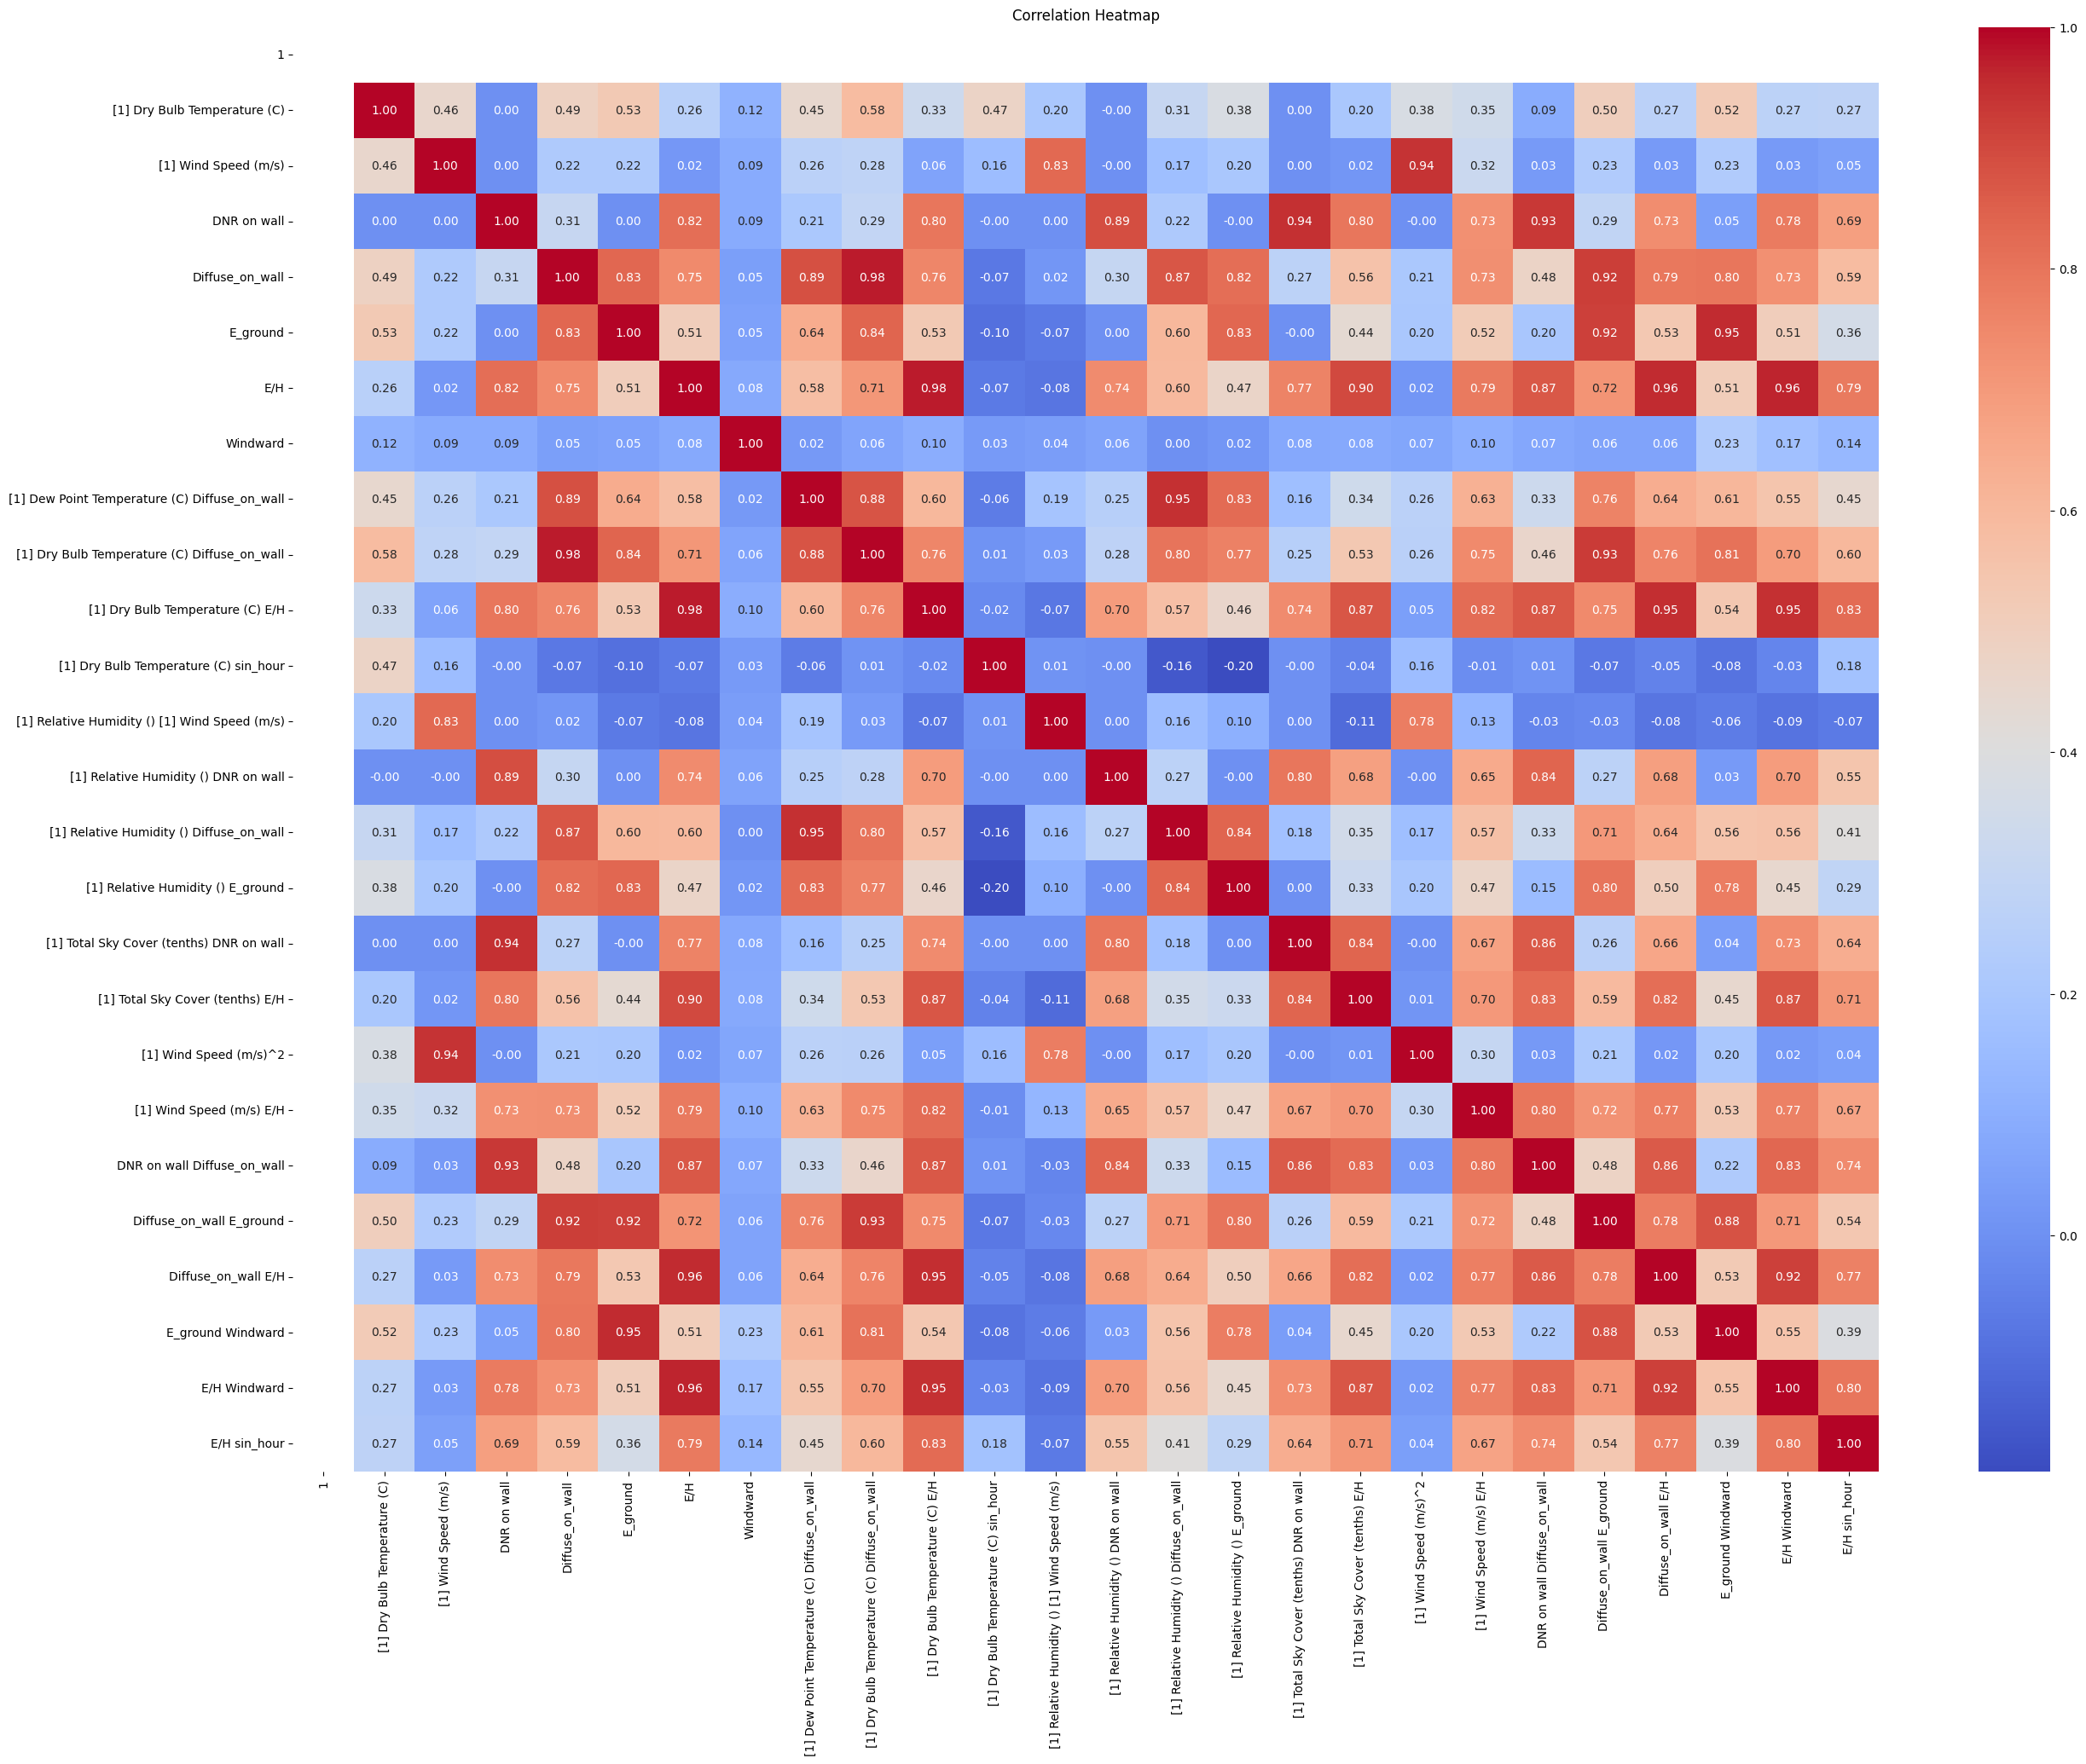

In [483]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_trans_dff.corr()

# Plot the heatmap with values
plt.figure(figsize=(30,22))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


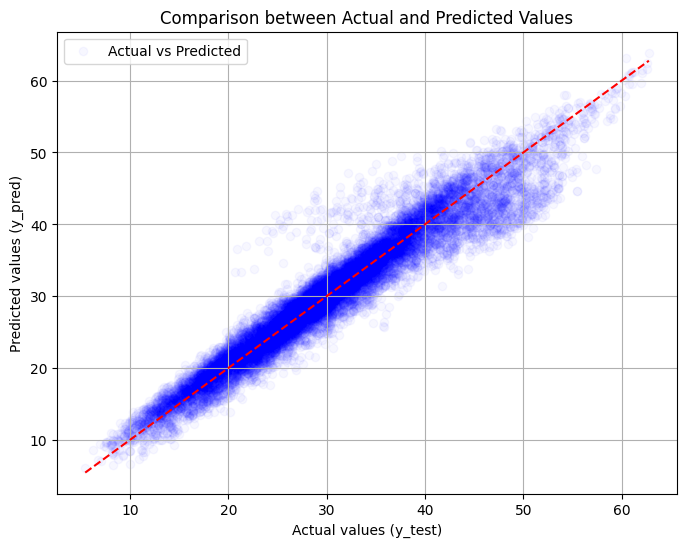

In [484]:
import matplotlib.pyplot as plt

# Plotting the comparison graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted',alpha=0.03)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Comparison between Actual and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
